In [1]:
import torch
import torch.optim as optim
import wandb
from Pytorch.environment_pytorch import WaterTank
from Pytorch.model_pytorch import MLP
from plotting import plot_history
import time
import pandas as pd
from Pytorch.learn_pytorch import learn_pytorch
%load_ext autoreload
%autoreload 2

# Learn

In [5]:
from params import influx_params, env_params, model_params, run_params, start_params, optimizer_params

model = MLP(model_params)
# Load the saved parameters
# model.load_state_dict(torch.load('model_params_pytorch/model_params.pth'))

optimizer = optim.Adam(model.parameters(), lr=optimizer_params["learning_rate"])

name = "pytorch 1-layer leaky long"

total_time = time.time()

model, timer = learn_pytorch(name, model, optimizer)

# Save the model's parameters to a file
torch.save(model.state_dict(), 'model_params_pytorch/model_params.pth')

total_time = time.time() - total_time

level,█▄▄▁▃▂▂▂▂▂▂▂▂▂▂▃▄▄▄▅▅▅▅▅▅▅▄▄▄▄▅▄▄▄▄▄▄▄▄▄
loss,█▁▁▅▂▃▃▄▄▄▄▄▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
max_abs_gradient,▁▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇▇▇██████████████▇
max_abs_weight,▁▁▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████
max_abs_weight_change,█▃▇▂▁▂▂▁▁▂▁▂▁▂▂▃▂▄▂▂▁▁▁▁▃▁▂▁▂▂▁▂▁▂▁▂▁▂▁▄
mean_abs_gradient,▁▁▁▅▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇█████████████████▇
mean_abs_weight,▁▁▂▂▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████
mean_abs_weight_change,▆▄█▄▁▁▂▂▂▂▂▂▂▂▂▃▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
outflux percentage,▁█▁▆▆▆▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃
level,10.27818
loss,0.27818


# Timer

In [3]:
df1 = pd.DataFrame({key: timer[key] for key in ["log", "epoch"]})
df2 = pd.DataFrame({key: timer[key] for key in timer if key not in ["log", "epoch"]})

print(total_time)
display(df1.describe())
df2.describe()

39.680899143218994


,log,epoch
count,100.000000,100.000000
mean,0.000770,0.314554
std,0.000357,0.025279
min,0.000606,0.291757
25%,0.000640,0.300804
50%,0.000664,0.305289
75%,0.000746,0.322818
max,0.003816,0.447076


,step,take_step,parameter_update
count,50000.000000,50000.000000,50000.000000
mean,0.000627,0.000244,0.000381
std,0.000132,0.000067,0.000082
min,0.000540,0.000205,0.000330
25%,0.000571,0.000220,0.000347
50%,0.000586,0.000226,0.000355
75%,0.000634,0.000237,0.000380
max,0.008214,0.005687,0.006954


# Run One Episode

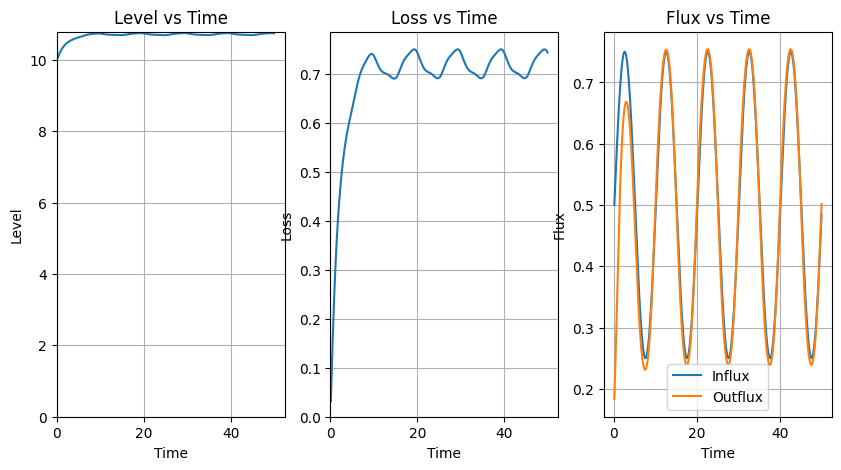

In [6]:
from params import influx_params, env_params, model_params, run_params, start_params, optimizer_params

# Initialize the environment and the MLP
model = MLP(model_params)

# Load the saved parameters
model.load_state_dict(torch.load('model_params_pytorch/model_params.pth'))

water_tank = WaterTank(start_params, env_params, influx_params)

for step in range(run_params["num_steps"]):
    # Prepare the input for the MLP network (current_level and next_step_influx)
    state = water_tank.get_state()

    # Get the outflux_percentage from the MLP
    outflux_percentage = model(state)

    # Take a step in the environment
    reward = water_tank.step(outflux_percentage)

plot_history(*water_tank.get_history())